# Assignment 3: Building a prediction model for Airbnb prices in Florence, Italy

### by Ataberk Atan & Barnabas Benyak

## 
All sample restriction steps are going to be typed with red. 

Data source: 04 January 2021 data from [Gabors Data Analysis](https://osf.io/b2ft9/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


## I. Data preparation

### a. Load dataset

In [2]:
df = pd.read_csv(
    "cs_bisnode_panel.csv",
    quotechar='"',
    delimiter=",",
    encoding="utf-8",
    dtype = "unicode"
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   comp_id               287829 non-null  object
 1   begin                 287829 non-null  object
 2   end                   287829 non-null  object
 3   COGS                  18257 non-null   object
 4   amort                 279789 non-null  object
 5   curr_assets           287698 non-null  object
 6   curr_liab             287698 non-null  object
 7   extra_exp             269300 non-null  object
 8   extra_inc             269300 non-null  object
 9   extra_profit_loss     270626 non-null  object
 10  finished_prod         17485 non-null   object
 11  fixed_assets          287698 non-null  object
 12  inc_bef_tax           280392 non-null  object
 13  intang_assets         287689 non-null  object
 14  inventories           287698 non-null  object
 15  liq_assets       

In [4]:
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034,2005-01-01,2005-12-31,NaN,692.59259033203125,7266.66650390625,7574.07421875,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
1,1001034,2006-01-01,2006-12-31,NaN,603.70367431640625,13122.22265625,12211.111328125,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
2,1001034,2007-01-01,2007-12-31,NaN,425.9259338378906,8196.2958984375,7800,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
3,1001034,2008-01-01,2008-12-31,NaN,300,8485.185546875,7781.4814453125,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,NaN
4,1001034,2009-01-01,2009-12-31,NaN,207.40740966796875,5137.037109375,15300,0,0,0,...,mix,Domestic,5630,56,3,1,Central,1990-11-19,NaN,0.0833333358168602


In [5]:
np.mean(df['D'].isna())

1.0

In [6]:
df = df.drop('D', axis=1)


Let's change the data type wherever it absolutely must be changed

In [7]:
df.infer_objects().dtypes

comp_id                 object
begin                   object
end                     object
COGS                    object
amort                   object
curr_assets             object
curr_liab               object
extra_exp               object
extra_inc               object
extra_profit_loss       object
finished_prod           object
fixed_assets            object
inc_bef_tax             object
intang_assets           object
inventories             object
liq_assets              object
material_exp            object
net_dom_sales           object
net_exp_sales           object
personnel_exp           object
profit_loss_year        object
sales                   object
share_eq                object
subscribed_cap          object
tang_assets             object
wages                   object
balsheet_flag           object
balsheet_length         object
balsheet_notfullyear    object
year                    object
founded_year            object
exit_year               object
ceo_coun

In [8]:
# List of numeric euro amount variables according to the variable list:

numeric_euros = ["COGS",
"amort",
"curr_assets",
"curr_liab",
"extra_exp",
"extra_inc",
"extra_profit_loss",
"finished_prod",
"fixed_assets",
"inc_bef_tax",
"intang_assets",
"inventories",
"liq_assets",
"material_exp",
"net_dom_sales",
"net_exp_sales",
"personnel_exp",
"profit_loss_year",
"sales",
"share_eq",
"subscribed_cap",
"tang_assets",
"wages"
]

In [9]:
numeric_others = ["ceo_count",
"foreign",
"female",
"birth_year",
"inoffice_days",
"labor_avg",
"balsheet_length"
]

In [10]:
categoricals = ["gender",
"origin",
"nace_main",
"ind2",
"ind",
"urban_m",
"region_m",
]

In [11]:
binaries = ["balsheet_flag",
"balsheet_notfullyear"
]

df[binaries].nunique()

balsheet_flag           2
balsheet_notfullyear    2
dtype: int64

In [12]:
date_years = ["year",
"founded_year",
"exit_year"
]

df[date_years][df['exit_year'].isna()]

,year,founded_year,exit_year
0,2005,1990,NaN
1,2006,1990,NaN
2,2007,1990,NaN
3,2008,1990,NaN
4,2009,1990,NaN
...,...,...,...
287824,2011,1990,NaN
287825,2012,1990,NaN
287826,2013,NaN,NaN
287827,2014,1990,NaN


In [13]:
df[date_years][df["founded_year"] == '2e3']


,year,founded_year,exit_year
149,2005,2e3,2012
150,2006,2e3,2012
151,2007,2e3,2012
152,2008,2e3,2012
153,2009,2e3,2012
...,...,...,...
287751,2011,2e3,NaN
287752,2012,2e3,NaN
287753,2013,2e3,NaN
287754,2014,2e3,NaN


In [14]:
df[date_years].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          287829 non-null  object
 1   founded_year  231372 non-null  object
 2   exit_year     38859 non-null   object
dtypes: object(3)
memory usage: 6.6+ MB


In [15]:
date_dates = ["founded_date",
"exit_date",
"begin",
"end"]

In [16]:
# Convert selected columns to numeric
df[numeric_euros] = df[numeric_euros].apply(pd.to_numeric)
df[numeric_others] = df[numeric_others].apply(pd.to_numeric)
df[categoricals] = df[categoricals].astype('category')
df[binaries] = df[binaries].astype(bool)
df[date_dates] = df[date_dates].apply(pd.to_datetime)
# df[date_years] = df[date_years].apply(lambda x: 2000 if 2e3 in x else x)
# df[date_years] = df[date_years].apply(lambda x: pd.to_datetime(x, format='%Y'))
df[date_years] = df[date_years].apply(pd.to_numeric)

In [17]:
df['age'] = df['year'] - df['founded_year']

In [18]:
df[["age","year","founded_year"]]

,age,year,founded_year
0,15.0,2005,1990.0
1,16.0,2006,1990.0
2,17.0,2007,1990.0
3,18.0,2008,1990.0
4,19.0,2009,1990.0
...,...,...,...
287824,21.0,2011,1990.0
287825,22.0,2012,1990.0
287826,NaN,2013,NaN
287827,24.0,2014,1990.0


<AxesSubplot: xlabel='age', ylabel='Count'>

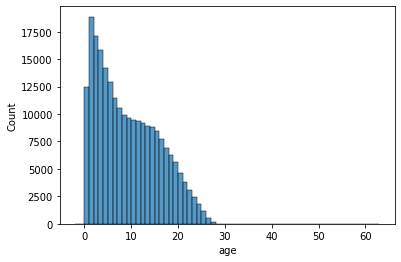

In [19]:
sns.histplot(data=df, x=df['age'], binwidth=1)


<AxesSubplot: xlabel='founded_year', ylabel='Count'>

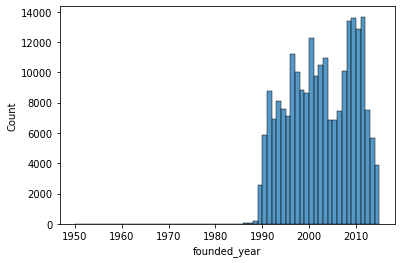

In [20]:
sns.histplot(data=df, x=df['founded_year'], binwidth=1)


### b. Label engineering, primary sample restrictions

design the target (fast growth), it can be measured in any way you like over one (2013 vs 2012) or two years (2014 vs 2012)

You need to argue for your choice, discussing a few alternatives.

we can look at growth in asset size, sales etc.



In [21]:
df['year'].value_counts()

2013    28474
2012    28469
2011    28222
2014    28151
2015    27506
2010    26784
2009    25596
2008    23733
2007    21804
2006    20200
2005    19147
2016     9743
Name: year, dtype: int64

In [22]:
df = df.sort_values(['comp_id', 'year'])

In [23]:
grouped = df.groupby('comp_id')


In [24]:
df['sales_growth'] = grouped['sales'].pct_change()


In [25]:
df[["comp_id", "year", "sales", "sales_growth"]].head(20)

,comp_id,year,sales,sales_growth
4240,100001576,2015,0.000000,NaN
134061,100007469056,2005,2303.703613,NaN
134062,100007469056,2006,185.185181,-0.919614
134063,100007469056,2007,725.925903,2.920000
134064,100007469056,2008,1122.222168,0.545918
134065,100007469056,2009,0.000000,-1.000000
134066,100007469056,2010,0.000000,NaN
134067,100007469056,2011,0.000000,NaN
134068,100007469056,2012,0.000000,NaN
134069,100007469056,2013,0.000000,NaN


In [26]:
df = df[df['year'] == 2012]


In [27]:
df[["comp_id", "year", "sales", "sales_growth"]].head(20)

,comp_id,year,sales,sales_growth
134068,100007469056,2012,0.000000e+00,NaN
42408,10002640896,2012,1.200000e+03,NaN
134082,100049059840,2012,3.912222e+04,-0.233120
134093,100062560256,2012,2.241111e+04,0.685515
134101,100069883904,2012,0.000000e+00,NaN
134109,100076380160,2012,7.977037e+04,0.022115
7,1001034,2012,0.000000e+00,NaN
134125,100124950528,2012,NaN,NaN
134134,100133371904,2012,3.520370e+04,-0.217631
134145,100140351488,2012,1.131111e+05,-0.035894


In [28]:
df = df[(~np.isnan(df['sales_growth'])) & (~np.isinf(df['sales_growth']))]

,comp_id,year,sales,sales_growth
134082,100049059840,2012,3.912222e+04,-0.233120
134093,100062560256,2012,2.241111e+04,0.685515
134109,100076380160,2012,7.977037e+04,0.022115
134134,100133371904,2012,3.520370e+04,-0.217631
134145,100140351488,2012,1.131111e+05,-0.035894
13355,1001521984,2012,4.843037e+05,-0.258088
4247,100163864,2012,1.713630e+05,-0.108946
42443,10018513920,2012,2.808148e+04,-0.266376
23,1002029,2012,1.136515e+06,0.982678
134181,100218839040,2012,5.320741e+04,-0.013392


In [29]:
df[["comp_id", "year", "sales", "sales_growth"]]


,comp_id,year,sales,sales_growth
134082,100049059840,2012,39122.222656,-0.233120
134093,100062560256,2012,22411.111328,0.685515
134109,100076380160,2012,79770.367188,0.022115
134134,100133371904,2012,35203.703125,-0.217631
134145,100140351488,2012,113111.109375,-0.035894
...,...,...,...,...
42394,9993630720,2012,95855.554688,-0.187435
134032,99957800960,2012,18351.851562,-0.280006
42396,9996602368,2012,1559.259277,-0.932217
134049,99978166272,2012,2888.888916,-0.480000
